In [4]:
import numpy as np 
import pandas as pd 
import math
import statistics

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df_clean = pd.read_csv("clearned_autotheft_data_1.csv")
df_clean.head()

,OCC_YEAR,OCC_MONTH,DIVISION,PREMISES_TYPE,NEIGHBOURHOOD_158,Count
0,2014.0,April,D11,House,Dufferin Grove (83),1
1,2014.0,April,D11,House,Lambton Baby Point (114),1
2,2014.0,April,D11,House,Runnymede-Bloor West Village (89),1
3,2014.0,April,D11,Outside,High Park-Swansea (87),1
4,2014.0,April,D11,Outside,Junction-Wallace Emerson (171),1


In [6]:
# create dummy variables
df_encoded = pd.get_dummies(
    df_clean,
    columns=['OCC_MONTH','DIVISION','PREMISES_TYPE',	'NEIGHBOURHOOD_158'],
    drop_first=True
)
df_encoded['OCC_YEAR'] = df_encoded['OCC_YEAR'].astype(int)
df_encoded.head()

,OCC_YEAR,Count,OCC_MONTH_August,OCC_MONTH_December,OCC_MONTH_February,OCC_MONTH_January,OCC_MONTH_July,OCC_MONTH_June,OCC_MONTH_March,OCC_MONTH_May,...,NEIGHBOURHOOD_158_Woburn North (142),NEIGHBOURHOOD_158_Woodbine Corridor (64),NEIGHBOURHOOD_158_Woodbine-Lumsden (60),NEIGHBOURHOOD_158_Wychwood (94),NEIGHBOURHOOD_158_Yonge-Bay Corridor (170),NEIGHBOURHOOD_158_Yonge-Doris (151),NEIGHBOURHOOD_158_Yonge-Eglinton (100),NEIGHBOURHOOD_158_Yonge-St.Clair (97),NEIGHBOURHOOD_158_York University Heights (27),NEIGHBOURHOOD_158_Yorkdale-Glen Park (31)
0,2014,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# encode dummy variables' values to 1 and 0
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)
df_encoded['OCC_YEAR_squared']=df_encoded['OCC_YEAR']**2

df_encoded.head()

,OCC_YEAR,Count,OCC_MONTH_August,OCC_MONTH_December,OCC_MONTH_February,OCC_MONTH_January,OCC_MONTH_July,OCC_MONTH_June,OCC_MONTH_March,OCC_MONTH_May,...,NEIGHBOURHOOD_158_Woodbine Corridor (64),NEIGHBOURHOOD_158_Woodbine-Lumsden (60),NEIGHBOURHOOD_158_Wychwood (94),NEIGHBOURHOOD_158_Yonge-Bay Corridor (170),NEIGHBOURHOOD_158_Yonge-Doris (151),NEIGHBOURHOOD_158_Yonge-Eglinton (100),NEIGHBOURHOOD_158_Yonge-St.Clair (97),NEIGHBOURHOOD_158_York University Heights (27),NEIGHBOURHOOD_158_Yorkdale-Glen Park (31),OCC_YEAR_squared
0,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4056196
1,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4056196
2,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4056196
3,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4056196
4,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4056196


In [8]:
#definde X and y
X = df_encoded.drop('Count', axis=1)
y = df_encoded['Count']

In [9]:
#split training and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# use GridSearchCV to find the best hyperparameters

param_grid = {
    'n_estimators':[100, 200],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 10,
    n_jobs = -1,
    verbose = 2, 
    scoring = 'neg_mean_squared_error',
        
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)


In [9]:
## data contains categorical variables: [OCC_MONTH,	DIVISION, PREMISES_TYPE, NEIGHBOURHOOD_158]
# from sklearn.model_selection import KFold


def evaluate_model(model, X_train, y_train, X_test, y_test, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_scores, test_scores = [], []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Fit the model
        if isinstance(model, sm.GLM):
            # We don't need to add constant here since it's already added in the model definition
            model_fit = model.fit()  # or however you've set up your model
            
            # Predict on validation and test set
            X_val_fold_with_const = sm.add_constant(X_val_fold)
            X_test_with_const = sm.add_constant(X_test)
            val_predictions = model_fit.predict(X_val_fold_with_const)
            test_predictions = model_fit.predict(X_test_with_const)
        else:  # Assuming any other model like RandomForestRegressor
            model.fit(X_train_fold, y_train_fold)
            val_predictions = model.predict(X_val_fold)
            test_predictions = model.predict(X_test)
        
        # Calculate MSE for validation (cross-validation) fold
        train_score = mean_squared_error(y_val_fold, val_predictions)
        train_scores.append(train_score)
        
        # Calculate MSE for test set (using the last model fit)
        test_score = mean_squared_error(y_test, test_predictions)
        test_scores.append(test_score)
    
    return np.array(train_scores), np.array(test_scores)

# Define models
# Note: Use the best parameters from GridSearchCV for Random Forest if available
rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# For GLM, we now include OCC_YEAR_squared implicitly since X_train already has it
glm_model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.NegativeBinomial())

# Evaluate models
rf_train_scores, rf_test_scores = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
glm_train_scores, glm_test_scores = evaluate_model(glm_model, X_train, y_train, X_test, y_test)


# Print results for Random Forest
print("Random Forest Model:")
print("Cross-Validation MSE (on validation sets):")
print(f"  Mean: {rf_train_scores.mean():.4f}, Std: {rf_train_scores.std():.4f}")
print("Test Set MSE:")
print(f"  Mean: {rf_test_scores.mean():.4f}, Std: {rf_test_scores.std():.4f}")
print()

# Print results for GLM
print("GLM Model:")
print("Cross-Validation MSE (on validation sets):")
print(f"  Mean: {glm_train_scores.mean():.4f}, Std: {glm_train_scores.std():.4f}")
print("Test Set MSE:")
print(f"  Mean: {glm_test_scores.mean():.4f}, Std: {glm_test_scores.std():.4f}")

Random Forest Model:
Cross-Validation MSE (on validation sets):
  Mean: 2.6689, Std: 0.2985
Test Set MSE:
  Mean: 2.3517, Std: 0.0180

GLM Model:
Cross-Validation MSE (on validation sets):
  Mean: 3.9967, Std: 0.6313
Test Set MSE:
  Mean: 3.4302, Std: 0.0000


In [10]:
# drop variable DIVISION, it contains similar information as NEIGHBOURHOOD
# test both method again

# data set excluding DIVISION
train_DIVISION_dummy_drop = [col for col in X_train.columns if 'DIVISION'in col]
X_train_reduced = X_train.drop(columns=train_DIVISION_dummy_drop)

test_DIVISION_dummy_drop = [col for col in X_test.columns if 'DIVISION'in col]
X_test_reduced = X_test.drop(columns=test_DIVISION_dummy_drop)

In [11]:
## data contains categorical variables: [OCC_MONTH, PREMISES_TYPE, NEIGHBOURHOOD_158], DIVISION dropped
# from sklearn.model_selection import KFold


def evaluate_model(model, X_train, y_train, X_test, y_test, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_scores, test_scores = [], []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Fit the model
        if isinstance(model, sm.GLM):
            # We don't need to add constant here since it's already added in the model definition
            model_fit = model.fit()  # or however you've set up your model
            
            # Predict on validation and test set
            X_val_fold_with_const = sm.add_constant(X_val_fold)
            X_test_with_const = sm.add_constant(X_test)
            val_predictions = model_fit.predict(X_val_fold_with_const)
            test_predictions = model_fit.predict(X_test_with_const)
        else:  # Assuming any other model like RandomForestRegressor
            model.fit(X_train_fold, y_train_fold)
            val_predictions = model.predict(X_val_fold)
            test_predictions = model.predict(X_test)
        
        # Calculate MSE for validation (cross-validation) fold
        train_score = mean_squared_error(y_val_fold, val_predictions)
        train_scores.append(train_score)
        
        # Calculate MSE for test set (using the last model fit)
        test_score = mean_squared_error(y_test, test_predictions)
        test_scores.append(test_score)
    
    return np.array(train_scores), np.array(test_scores)

# Define models
# Note: Use the best parameters from GridSearchCV for Random Forest if available
rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# For GLM, we now include OCC_YEAR_squared implicitly since X_train already has it
glm_model = sm.GLM(y_train, sm.add_constant(X_train_reduced), family=sm.families.NegativeBinomial())

# Evaluate models
rf_train_scores, rf_test_scores = evaluate_model(rf_model, X_train_reduced, y_train, X_test_reduced, y_test)
glm_train_scores, glm_test_scores = evaluate_model(glm_model, X_train_reduced, y_train, X_test_reduced, y_test)


# Print results for Random Forest
print("Random Forest Model:")
print("Cross-Validation MSE (on validation sets):")
print(f"  Mean: {rf_train_scores.mean():.4f}, Std: {rf_train_scores.std():.4f}")
print("Test Set MSE:")
print(f"  Mean: {rf_test_scores.mean():.4f}, Std: {rf_test_scores.std():.4f}")
print()

# Print results for GLM
print("GLM Model:")
print("Cross-Validation MSE (on validation sets):")
print(f"  Mean: {glm_train_scores.mean():.4f}, Std: {glm_train_scores.std():.4f}")
print("Test Set MSE:")
print(f"  Mean: {glm_test_scores.mean():.4f}, Std: {glm_test_scores.std():.4f}")

Random Forest Model:
Cross-Validation MSE (on validation sets):
  Mean: 2.7635, Std: 0.2847
Test Set MSE:
  Mean: 2.4641, Std: 0.0142

GLM Model:
Cross-Validation MSE (on validation sets):
  Mean: 4.0235, Std: 0.6273
Test Set MSE:
  Mean: 3.4604, Std: 0.0000


In [13]:
# drop variable PREMISES_TYPE, test the effects
# test both method again

# data set excluding PREMISES_TYPE
train_PREMISES_dummy_drop = [col for col in X_train.columns if 'PREMISES'in col]
X_train_reduced_P = X_train.drop(columns=train_PREMISES_dummy_drop)

test_PREMISES_dummy_drop = [col for col in X_test.columns if 'PREMISES'in col]
X_test_reduced_P = X_test.drop(columns=test_PREMISES_dummy_drop)

In [14]:
#For GLM, we now include OCC_YEAR_squared implicitly since X_train already has it
glm_model = sm.GLM(y_train, sm.add_constant(X_train_reduced_P), family=sm.families.NegativeBinomial())

# Evaluate models
rf_train_scores, rf_test_scores = evaluate_model(rf_model, X_train_reduced_P, y_train, X_test_reduced_P, y_test)
glm_train_scores, glm_test_scores = evaluate_model(glm_model, X_train_reduced_P, y_train, X_test_reduced_P, y_test)


# Print results for Random Forest
print("Random Forest Model:")
print("Cross-Validation MSE (on validation sets):")
print(f"  Mean: {rf_train_scores.mean():.4f}, Std: {rf_train_scores.std():.4f}")
print("Test Set MSE:")
print(f"  Mean: {rf_test_scores.mean():.4f}, Std: {rf_test_scores.std():.4f}")
print()

# Print results for GLM
print("GLM Model:")
print("Cross-Validation MSE (on validation sets):")
print(f"  Mean: {glm_train_scores.mean():.4f}, Std: {glm_train_scores.std():.4f}")
print("Test Set MSE:")
print(f"  Mean: {glm_test_scores.mean():.4f}, Std: {glm_test_scores.std():.4f}")

Random Forest Model:
Cross-Validation MSE (on validation sets):
  Mean: 5.4034, Std: 0.7990
Test Set MSE:
  Mean: 4.6503, Std: 0.0528

GLM Model:
Cross-Validation MSE (on validation sets):
  Mean: 4.9242, Std: 0.7764
Test Set MSE:
  Mean: 4.2441, Std: 0.0000


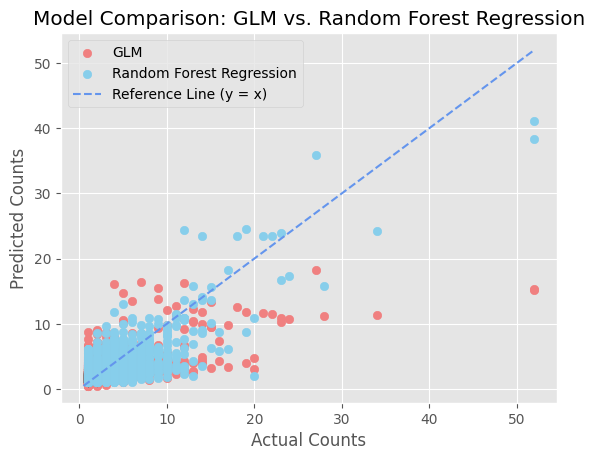

In [17]:
glm_model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.NegativeBinomial())
X_test_with_const = sm.add_constant(X_test)
glm_test_pred = glm_model.fit().predict(X_test_with_const)

# Fit the RF model
rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_test_pred = rf_model.predict(X_test)




# Plot the results
plt.scatter(y_test, glm_test_pred, label='GLM', color='lightcoral')
plt.scatter(y_test, rf_test_pred, label='Random Forest Regression', color='skyblue')
# Add a diagonal line
min_val = min(y_test.min(), glm_test_pred.min(), rf_test_pred.min())
max_val = max(y_test.max(), glm_test_pred.max(), rf_test_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], color='cornflowerblue', linestyle='--', label='Reference Line (y = x)')
plt.xlabel("Actual Counts")
plt.ylabel("Predicted Counts")
plt.legend()
plt.title("Model Comparison: GLM vs. Random Forest Regression")
plt.show()




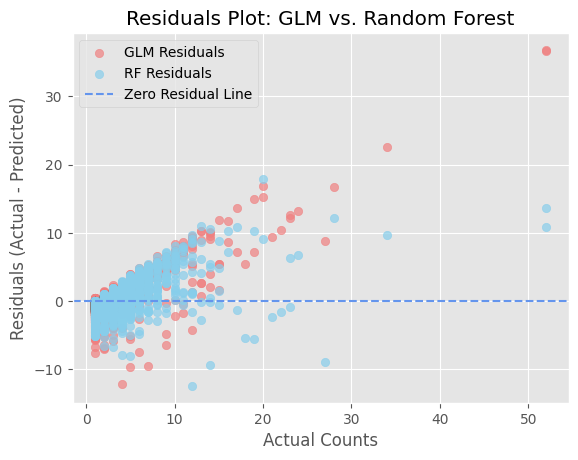

In [16]:
# Calculate residuals for both models
glm_residuals = y_test - glm_test_pred
rf_residuals = y_test - rf_test_pred

# Plot residuals
plt.scatter(y_test, glm_residuals, color='lightcoral', alpha=0.7, label='GLM Residuals')
plt.scatter(y_test, rf_residuals, color='skyblue', alpha=0.7, label='RF Residuals')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='cornflowerblue', linestyle='--', label='Zero Residual Line')

# Add labels, legend, and title
plt.xlabel("Actual Counts")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot: GLM vs. Random Forest")
plt.legend()
plt.show()


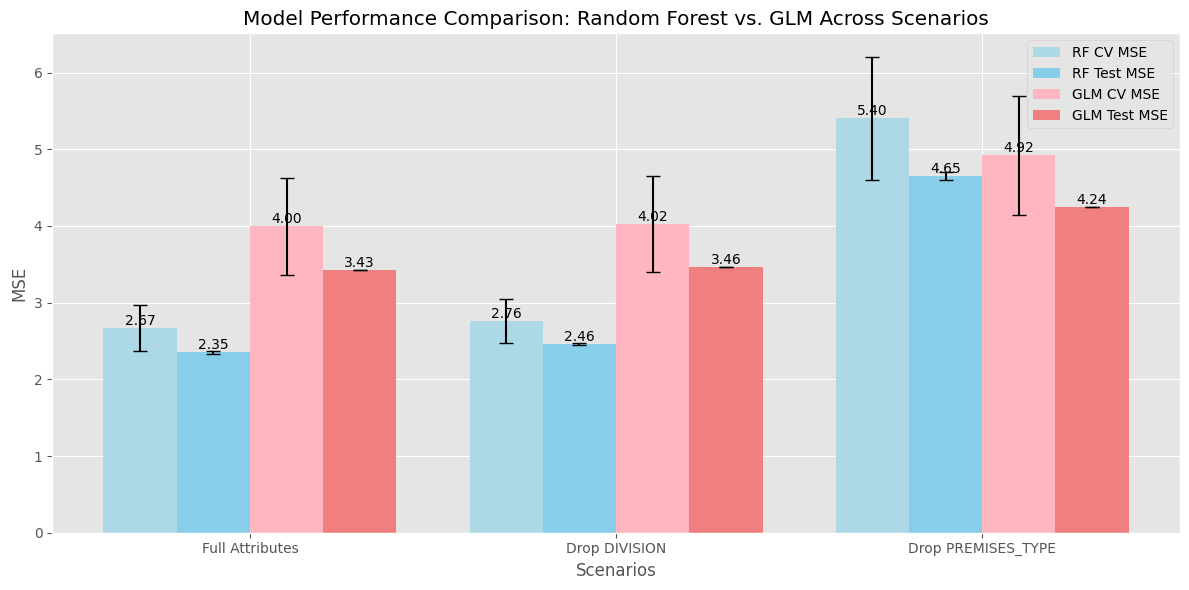

In [32]:
# Data for each scenario
scenarios = ['Full Attributes', 'Drop DIVISION', 'Drop PREMISES_TYPE']

# Random Forest metrics
rf_cv_means = [2.6689, 2.7635, 5.4034]
rf_cv_stds = [0.2985, 0.2847, 0.7990]
rf_test_means = [2.3517, 2.4641, 4.6503]
rf_test_stds = [0.0180, 0.0142, 0.0528]

# GLM metrics
glm_cv_means = [3.9967, 4.0235, 4.9242]
glm_cv_stds = [0.6313, 0.6273, 0.7764]
glm_test_means = [3.4302, 3.4604, 4.2441]
glm_test_stds = [0.0000, 0.0000, 0.0000]

# Bar positions
x = np.arange(len(scenarios))  # [0, 1, 2]
width = 0.2  # Width of bars

# Create the figure
plt.figure(figsize=(12, 6))

# Plot bars with error bars for Random Forest
bars1 = plt.bar(x - width*1.5, rf_cv_means, width, yerr=rf_cv_stds, label='RF CV MSE', color='lightblue', capsize=5)
bars2 = plt.bar(x - width/2, rf_test_means, width, yerr=rf_test_stds, label='RF Test MSE', color='skyblue', capsize=5)

# Plot bars with error bars for GLM
bars3 = plt.bar(x + width/2, glm_cv_means, width, yerr=glm_cv_stds, label='GLM CV MSE', color='lightpink', capsize=5)
bars4 = plt.bar(x + width*1.5, glm_test_means, width, yerr=glm_test_stds, label='GLM Test MSE', color='lightcoral', capsize=5)

# Add values on top of each bar
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Scenarios')
plt.ylabel('MSE')
plt.title('Model Performance Comparison: Random Forest vs. GLM Across Scenarios')
plt.xticks(x, scenarios)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
